In [15]:
import pandas as pd
df = pd.read_csv('https://github.com/afryanda/sentiment_analysis/raw/main/datasets/spotify-reviews.csv')
# data from kaggle: 
# https://www.kaggle.com/datasets/taqiyyaghazi/indonesian-marketplace-product-reviews

In [16]:
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [17]:
df=df[['Review', 'Rating']]
df=df.iloc[0:1500]
df.dropna(inplace=True)

In [21]:
def labeling(rating):
  if rating > 3:
    return 1
  else:
    return 0

df['Sentiment'] = df['Rating'].apply(labeling)
df.head()

,Review,Rating,Sentiment
0,"Great music service, the audio is high quality...",5,1
1,Please ignore previous negative rating. This a...,5,1
2,"This pop-up ""Get the best Spotify experience o...",4,1
3,Really buggy and terrible to use as of recently,1,0
4,Dear Spotify why do I get songs that I didn't ...,1,0


In [22]:
df = df.drop(columns='Rating')

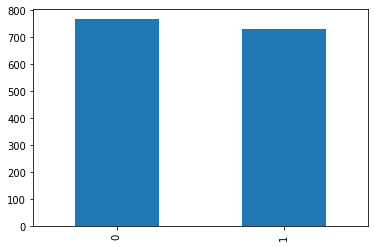

In [25]:
df['Sentiment'].value_counts().sort_index().plot(kind='bar')

In [27]:
# ubah ke numpy array
review = df['Review'].values
label = df['Sentiment'].values

In [30]:
# split data latih dan data test
from sklearn.model_selection import train_test_split
review_latih, review_test, label_latih, label_test = train_test_split(review, label, test_size=0.2)

In [43]:
# tokenizing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(review_latih)
tokenizer.fit_on_texts(review_test)

sekuen_latih = tokenizer.texts_to_sequences(review_latih)
sekuen_test = tokenizer.texts_to_sequences(review_test)

padded_latih = pad_sequences(sekuen_latih)
padded_test = pad_sequences(sekuen_test)

In [48]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [49]:
history = model.fit(padded_latih, label_latih, epochs=15, 
    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/15
38/38 - 6s - loss: 0.6717 - accuracy: 0.6033 - val_loss: 0.6084 - val_accuracy: 0.7033 - 6s/epoch - 164ms/step
Epoch 2/15
38/38 - 3s - loss: 0.5537 - accuracy: 0.7333 - val_loss: 0.4692 - val_accuracy: 0.7967 - 3s/epoch - 75ms/step
Epoch 3/15
38/38 - 3s - loss: 0.3437 - accuracy: 0.8683 - val_loss: 0.3894 - val_accuracy: 0.8333 - 3s/epoch - 72ms/step
Epoch 4/15
38/38 - 3s - loss: 0.2005 - accuracy: 0.9317 - val_loss: 0.4454 - val_accuracy: 0.8467 - 3s/epoch - 73ms/step
Epoch 5/15
38/38 - 3s - loss: 0.1187 - accuracy: 0.9658 - val_loss: 0.4996 - val_accuracy: 0.8467 - 3s/epoch - 77ms/step
Epoch 6/15
38/38 - 3s - loss: 0.0805 - accuracy: 0.9792 - val_loss: 0.5472 - val_accuracy: 0.8000 - 3s/epoch - 74ms/step
Epoch 7/15
38/38 - 3s - loss: 0.0648 - accuracy: 0.9825 - val_loss: 0.6402 - val_accuracy: 0.8300 - 3s/epoch - 79ms/step
Epoch 8/15
38/38 - 3s - loss: 0.0541 - accuracy: 0.9842 - val_loss: 0.8502 - val_accuracy: 0.8300 - 3s/epoch - 76ms/step
Epoch 9/15
38/38 - 3s - loss: 0